#### Author: Ernie Sumoso

In [1]:
import pandas as pd

# Add range, iqr and if feasible skewness to cutomized describe function.
def get_custom_describe(csv_filename):
    
    # get dataframe description
    df = pd.read_csv(csv_filename)
    df_describe = df.describe().copy()
    
    # adding range and IQR rows
    df_describe.loc['range'] = df_describe.loc['max'] - df_describe.loc['min']
    df_describe.loc['IQR'] = df_describe.loc['75%'] - df_describe.loc['25%']
    
    # adding skewness row
    row_skew = df.skew(numeric_only = True)
    df_skew = pd.DataFrame(row_skew).transpose()
    df_skew.index = ['skewness']
    
    # adding kurtosis row
    row_kurt = df.kurt(numeric_only = True)
    df_kurt = pd.DataFrame(row_kurt).transpose()
    df_kurt.index = ['kurtosis']
    
    # set the final dataframe
    return pd.concat([df_describe, df_skew, df_kurt])
 
df_describe = get_custom_describe('evaluation_1000.csv')
df_describe

match_id    start_time  radiant_team_id  dire_team_id  \
count     1.000000e+03  1.000000e+03     9.940000e+02  9.900000e+02   
mean      7.280123e+09  1.691750e+09     8.412689e+06  8.372689e+06   
std       5.552970e+06  3.311331e+05     1.630902e+06  1.774756e+06   
min       7.270551e+09  1.691174e+09     5.000000e+00  5.000000e+00   
25%       7.275439e+09  1.691473e+09     8.629317e+06  8.629317e+06   
50%       7.279881e+09  1.691752e+09     8.893837e+06  8.893837e+06   
75%       7.284694e+09  1.692016e+09     9.030664e+06  9.075558e+06   
max       7.289865e+09  1.692335e+09     9.161756e+06  9.161735e+06   
range     1.931341e+07  1.161000e+06     9.161751e+06  9.161730e+06   
IQR       9.255446e+06  5.433668e+05     4.013470e+05  4.462410e+05   
skewness  4.002168e-02  1.586789e-02    -3.688718e+00 -3.466568e+00   
kurtosis -1.212361e+00 -1.186561e+00     1.313933e+01  1.110416e+01   

              leagueid  series_type       region  team2_ban1  team1_ban1  \
count      1000.000000  1000.000000  1000.000000  987.000000  987.000000   
mean      15159.561000     0.927000     5.282000   78.391084   76.886525   
std         448.376022     0.319018     7.273196   31.841281   32.862818   
min       12903.000000     0.000000     2.000000    1.000000    2.000000   
25%       14915.000000     1.000000     3.000000   61.000000   55.000000   
50%       15257.000000     1.000000     3.000000   85.000000   80.000000   
75%       15496.000000     1.000000     3.000000   98.000000  101.000000   
max       15690.000000     2.000000    38.000000  138.000000  138.000000   
range      2787.000000     2.000000    36.000000  137.000000  136.000000   
IQR         581.000000     0.000000     0.000000   37.000000   46.000000   
skewness     -2.568323    -1.555297     3.831518   -0.299744   -0.191004   
kurtosis     10.916364     5.645976    14.072263   -0.366198   -0.581526   

          team1_ban2  ...  team2_hero1_wins  team2_hero2_gamesPlayed  \
count     987.000000  ...        977.000000               977.000000   
mean       77.338399  ...         38.834186                69.024565   
std        35.765505  ...         50.968842                92.829836   
min         1.000000  ...          0.000000                 1.000000   
25%        53.000000  ...          7.000000                13.000000   
50%        85.000000  ...         19.000000                35.000000   
75%       103.500000  ...         48.000000                86.000000   
max       138.000000  ...        273.000000               559.000000   
range     137.000000  ...        273.000000               558.000000   
IQR        50.500000  ...         41.000000                73.000000   
skewness   -0.279290  ...          2.306247                 2.764055   
kurtosis   -0.735554  ...          5.324753                 8.741564   

          team2_hero2_wins  team2_hero3_gamesPlayed  team2_hero3_wins  \
count           977.000000               977.000000        977.000000   
mean             35.153531                56.725691         28.876151   
std              47.539231                72.265098         37.093342   
min               0.000000                 1.000000          0.000000   
25%               6.000000                11.000000          5.000000   
50%              18.000000                31.000000         15.000000   
75%              45.000000                73.000000         37.000000   
max             273.000000               559.000000        273.000000   
range           273.000000               558.000000        273.000000   
IQR              39.000000                62.000000         32.000000   
skewness          2.707357                 2.794064          2.660893   
kurtosis          8.322441                10.771864          9.480054   

          team2_hero4_gamesPlayed  team2_hero4_wins  team2_hero5_gamesPlayed  \
count                  977.000000        977.000000               977.000000   
mean                    49.617195         25.589560   

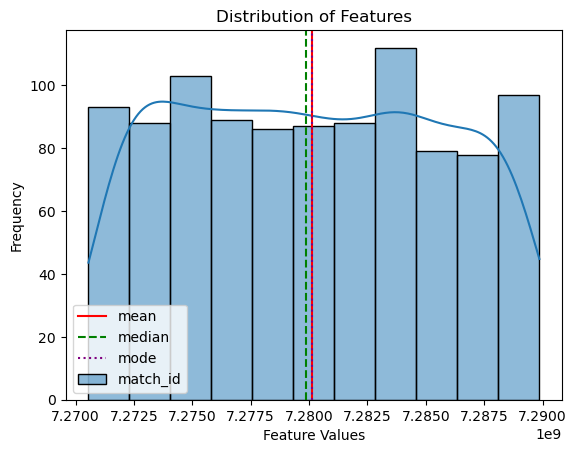

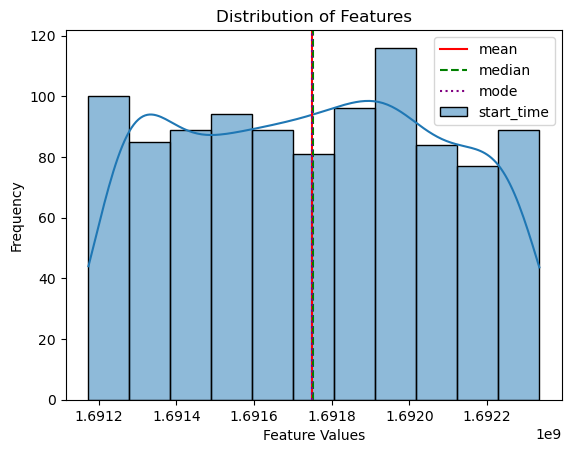

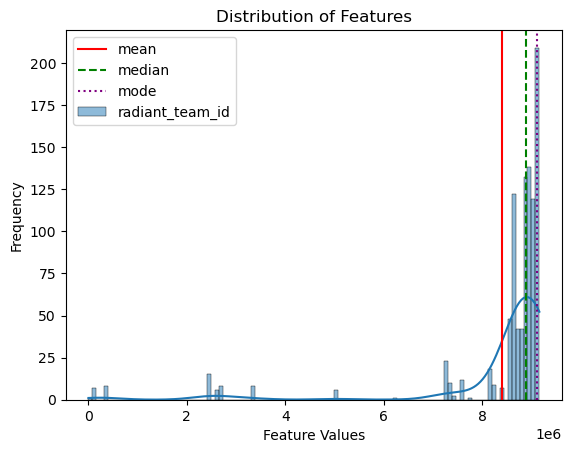

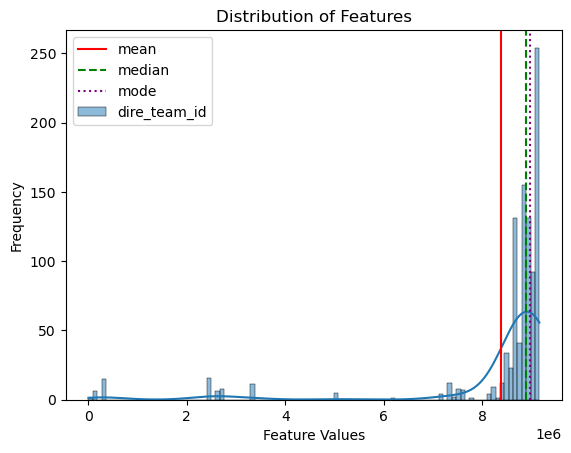

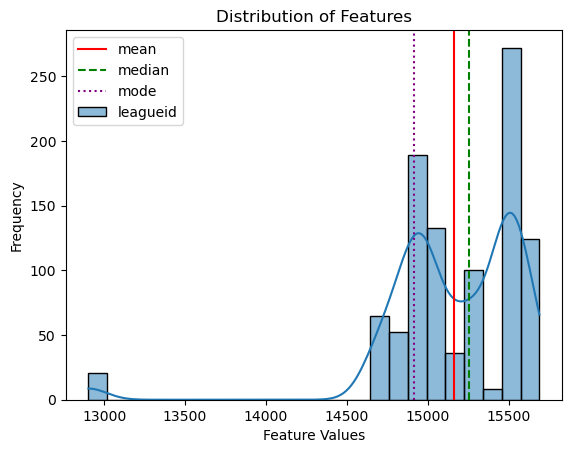

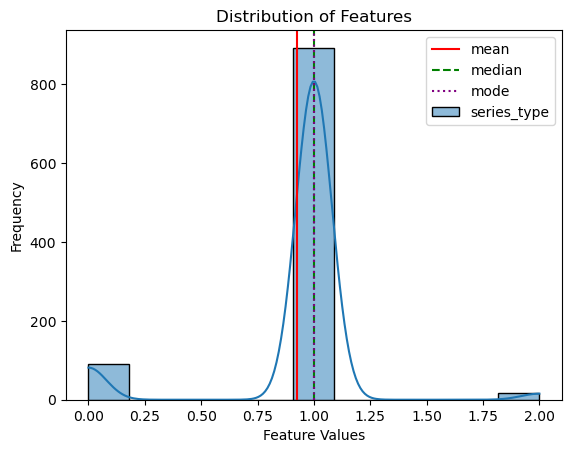

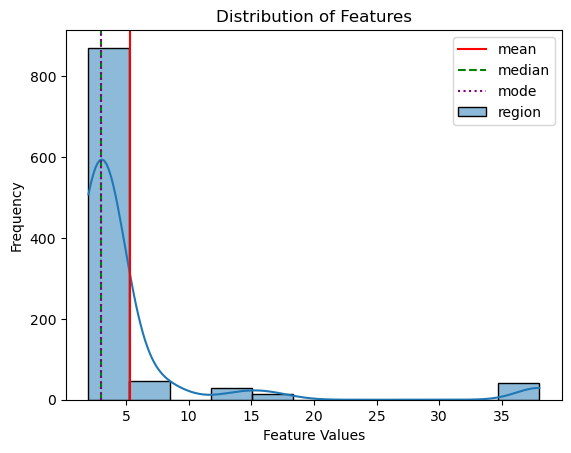

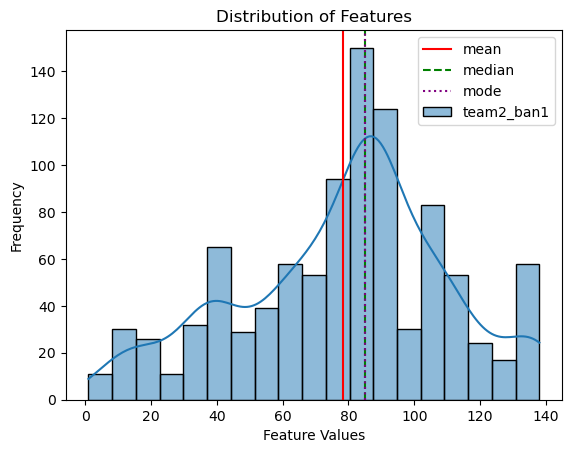

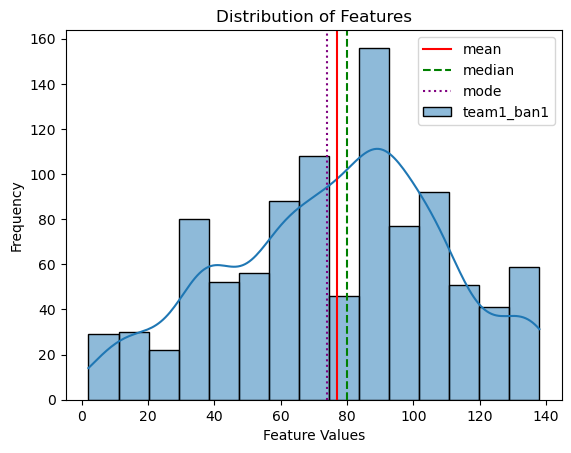

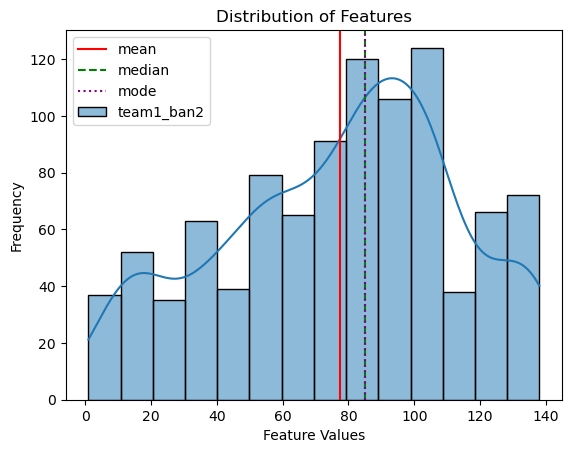

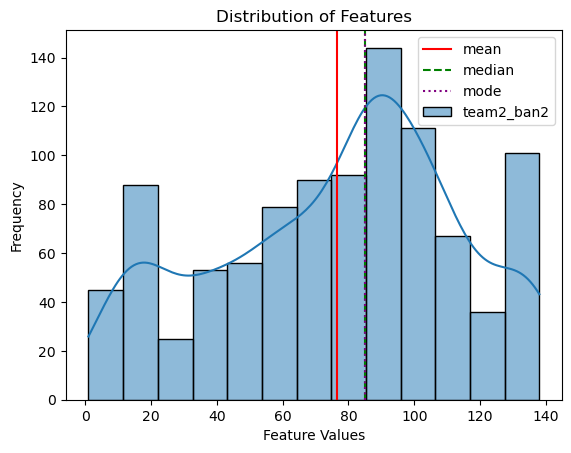

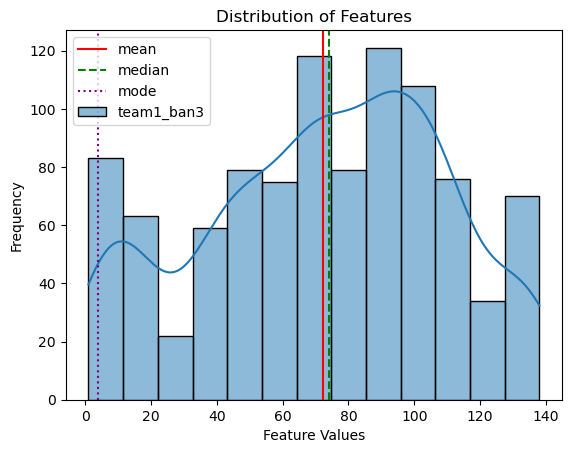

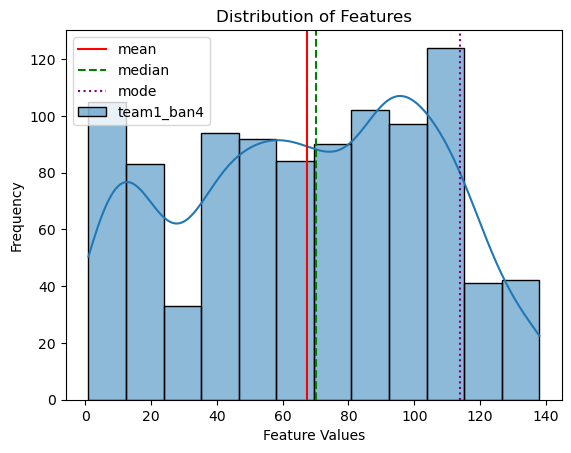

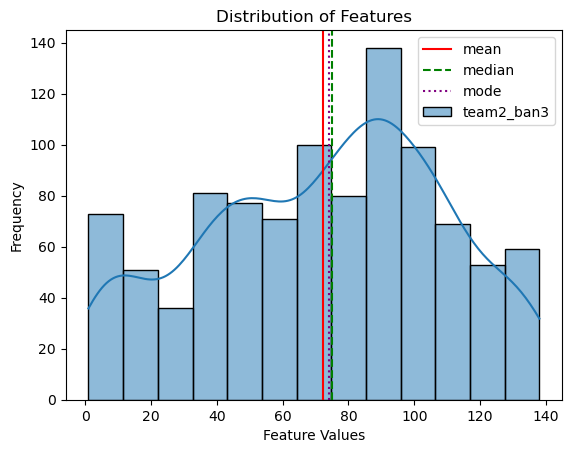

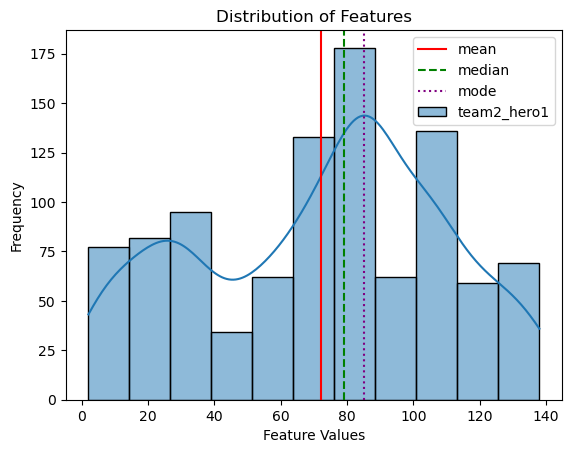

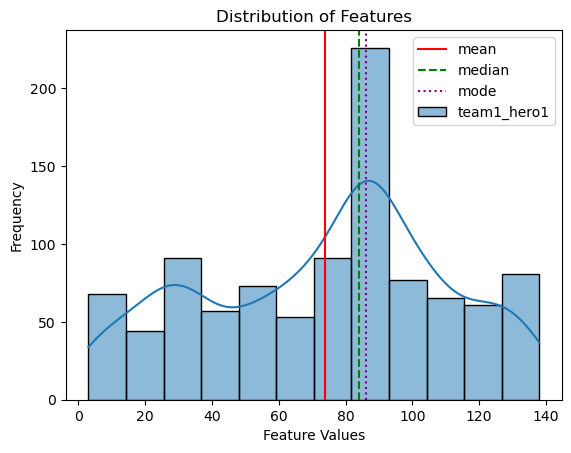

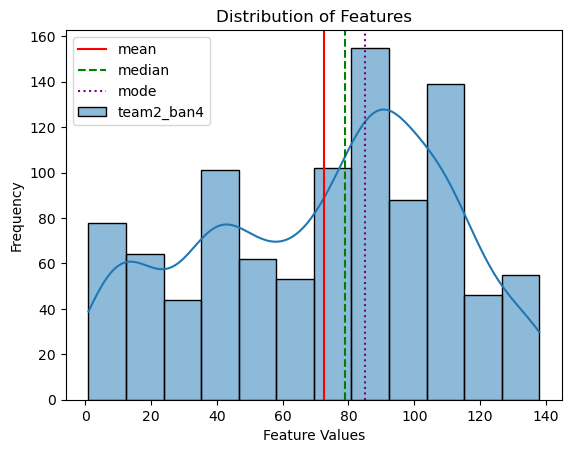

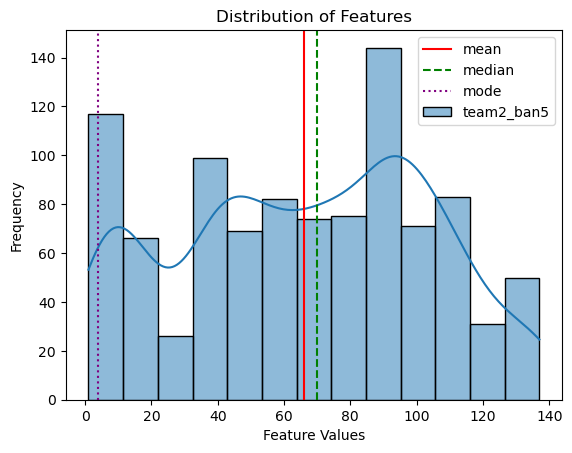

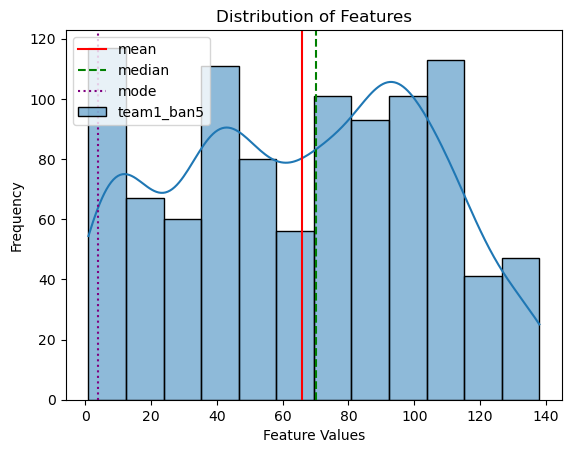

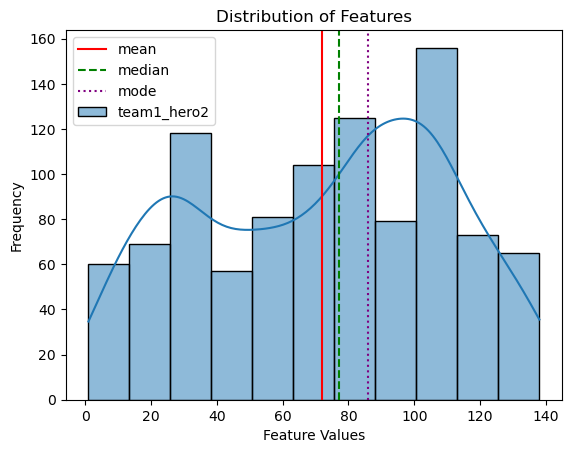

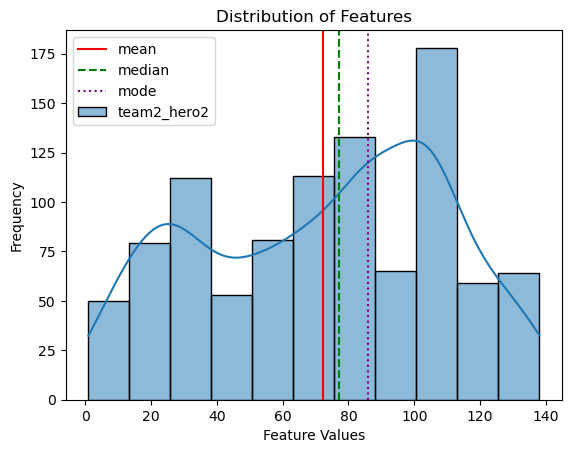

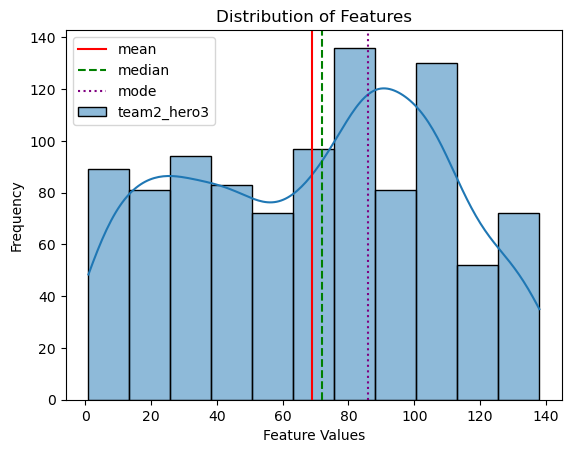

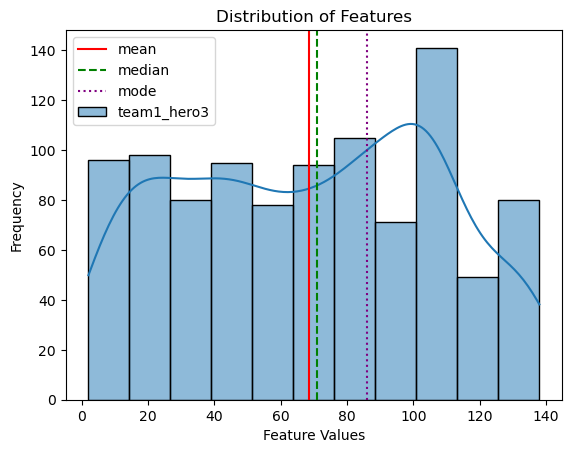

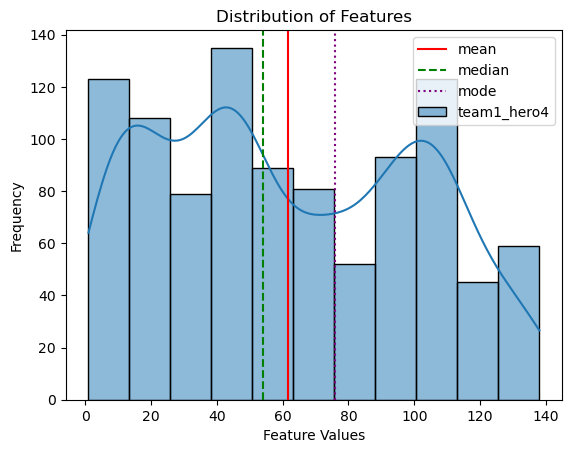

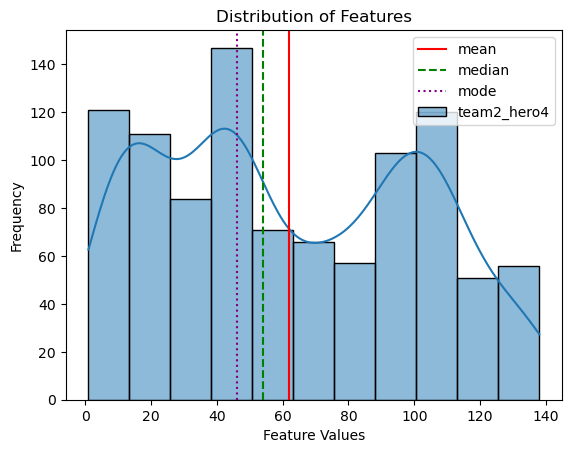

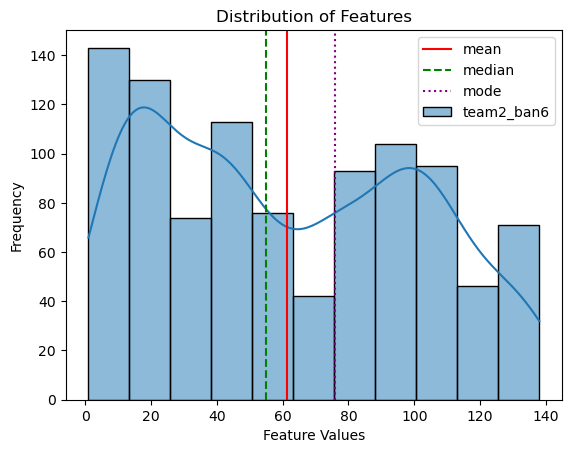

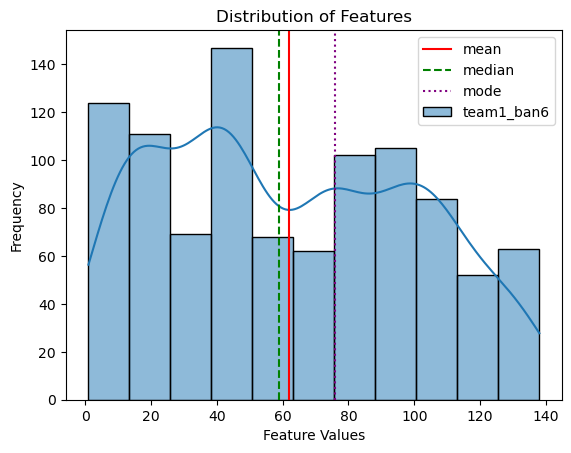

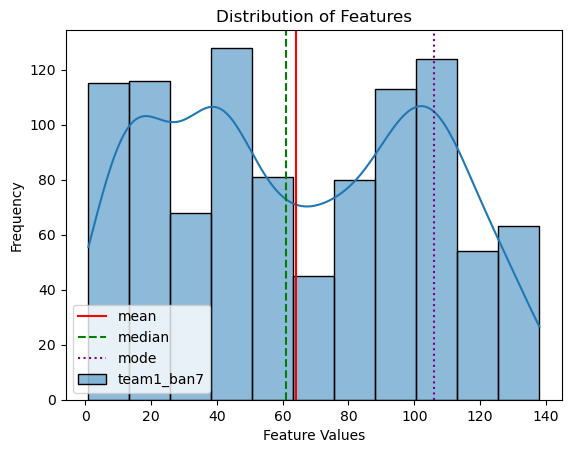

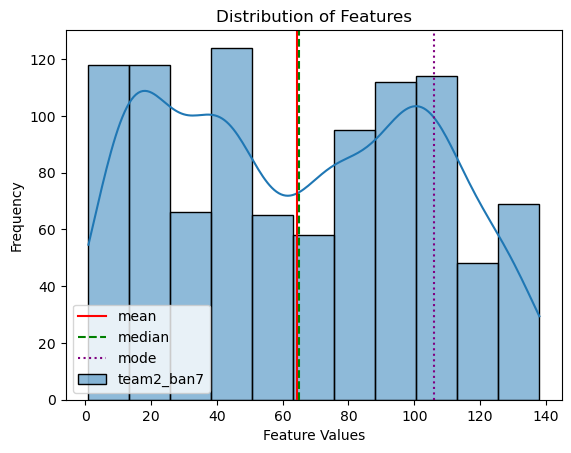

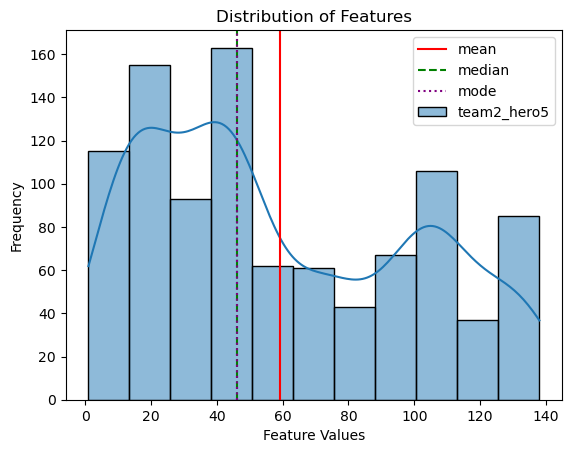

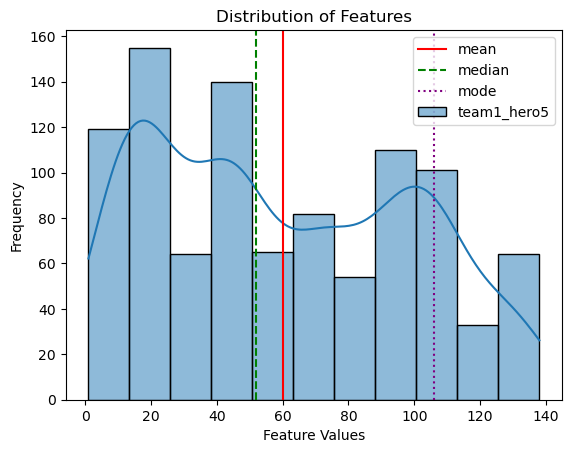

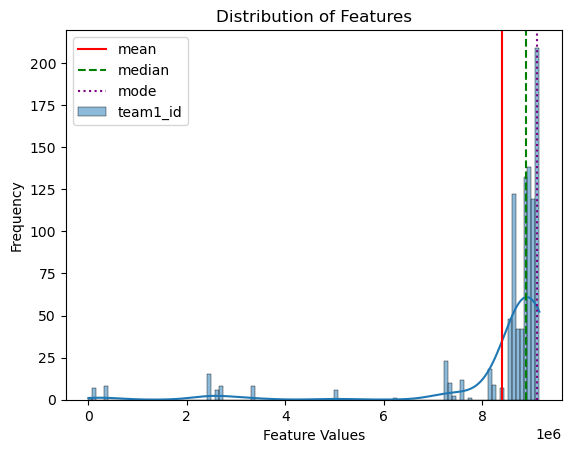

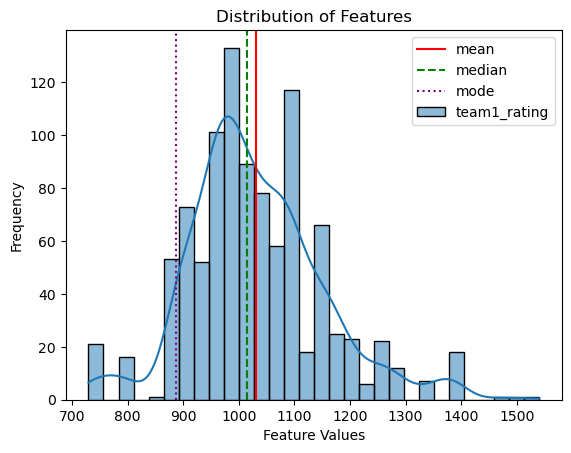

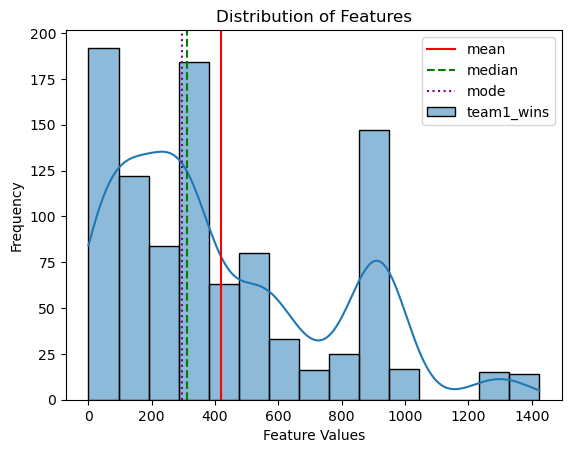

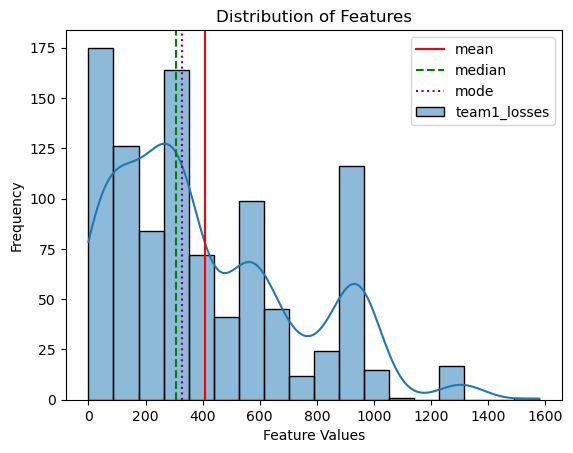

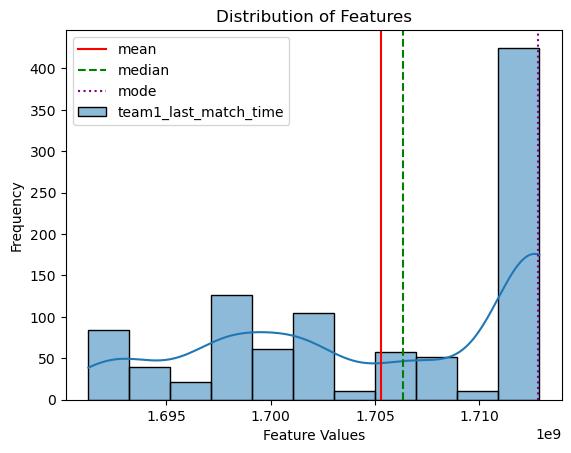

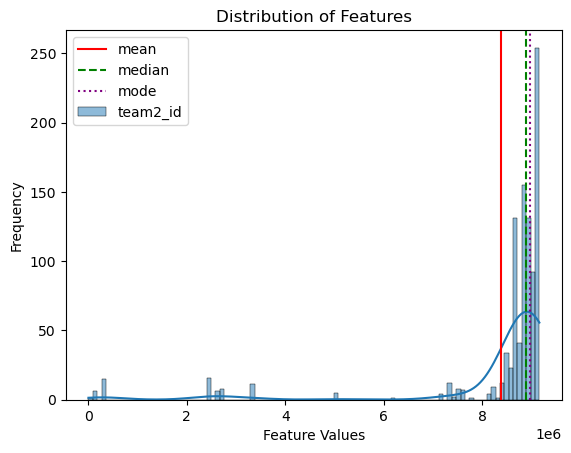

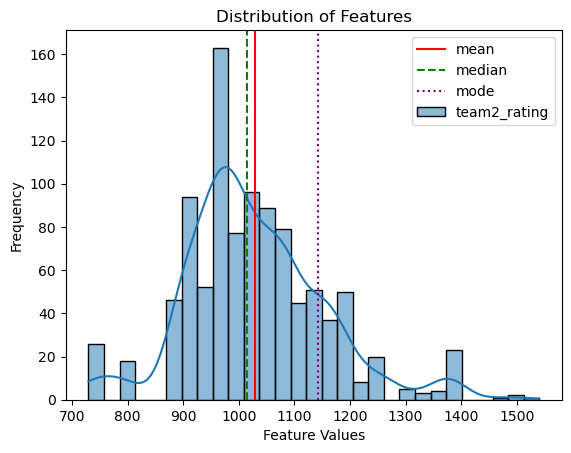

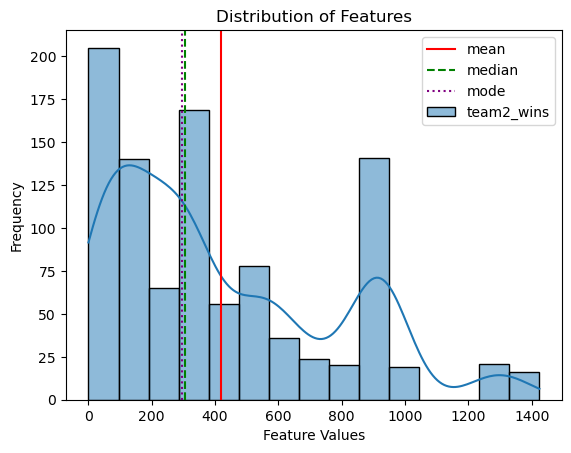

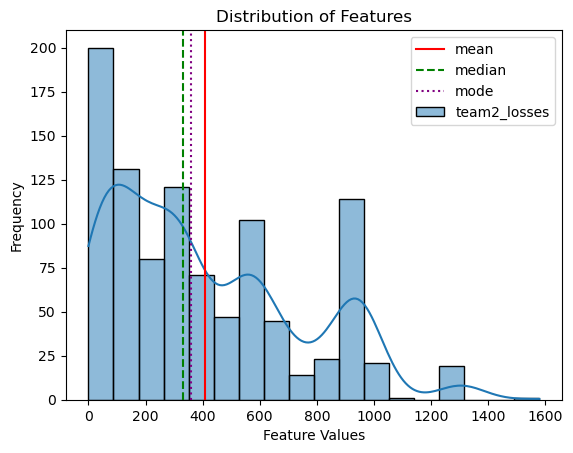

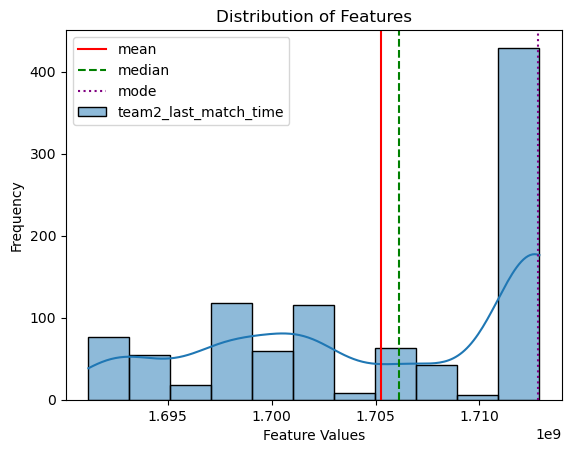

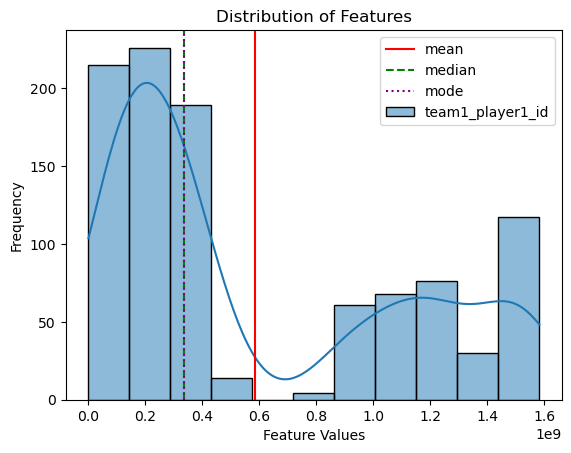

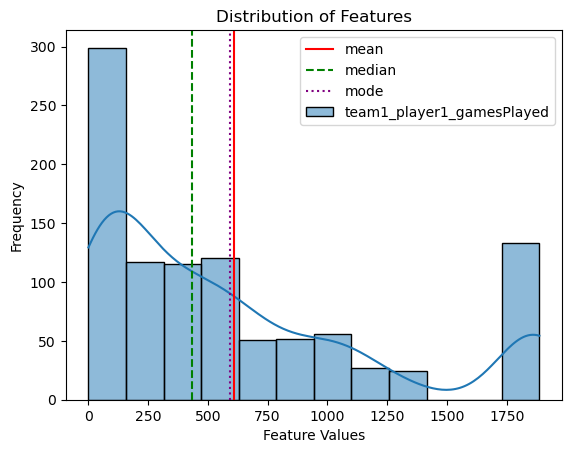

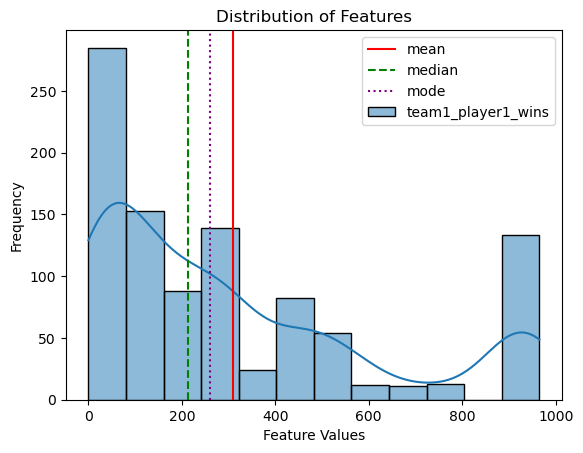

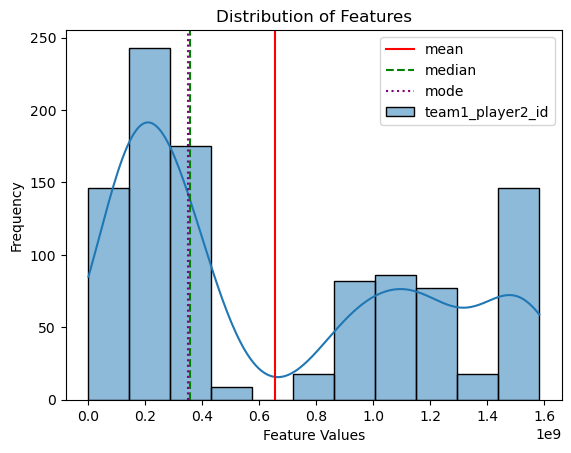

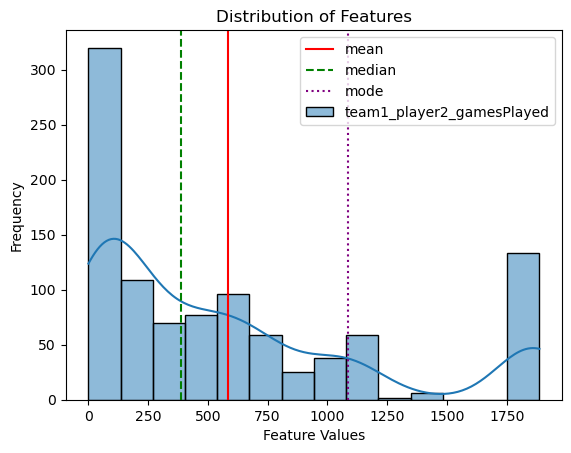

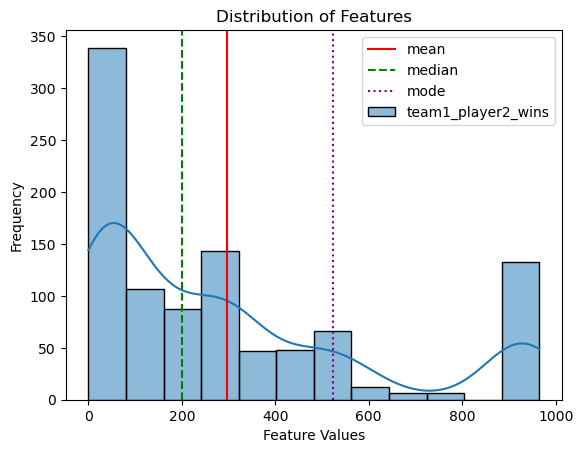

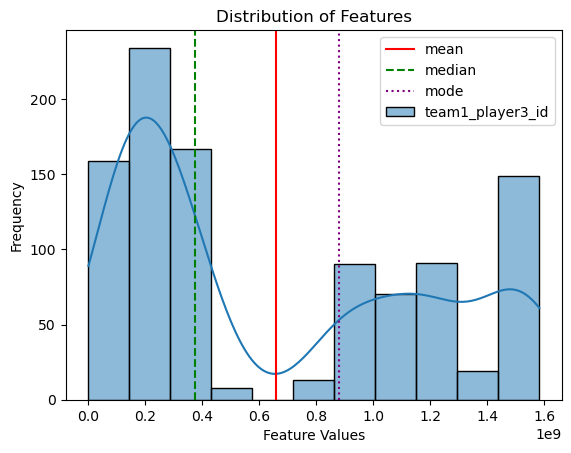

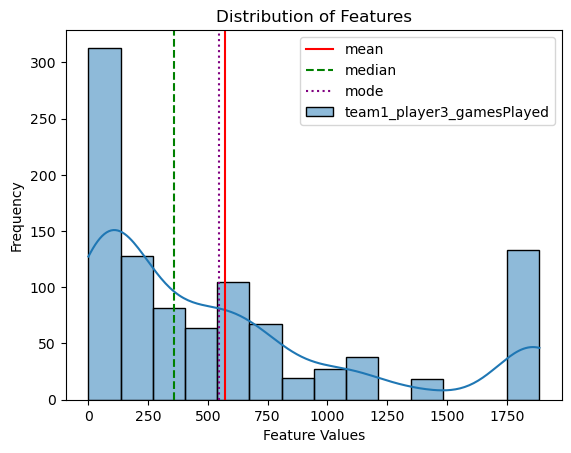

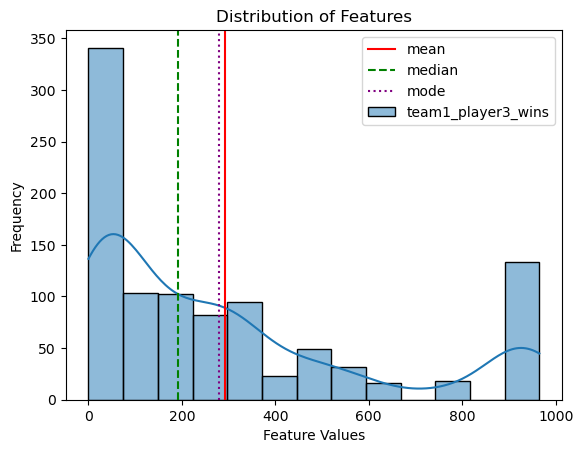

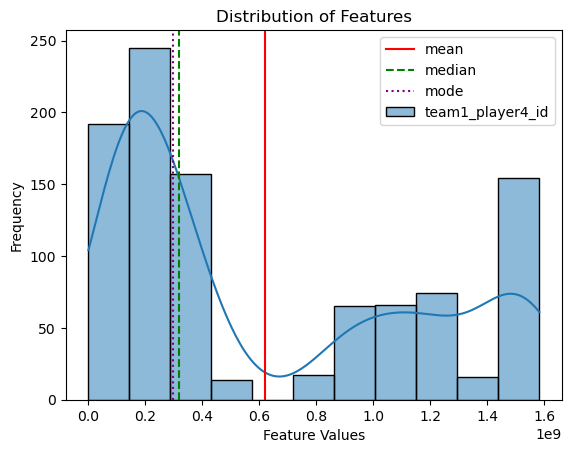

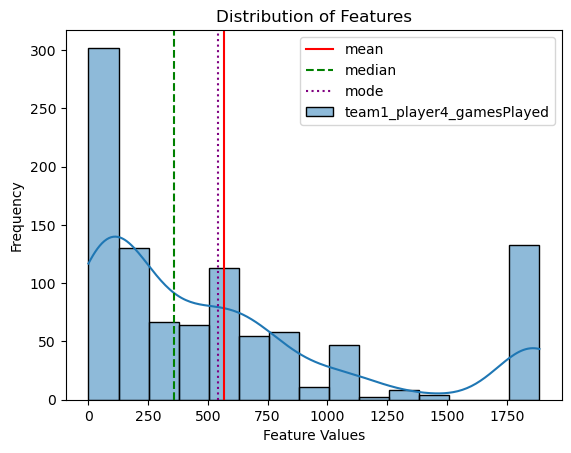

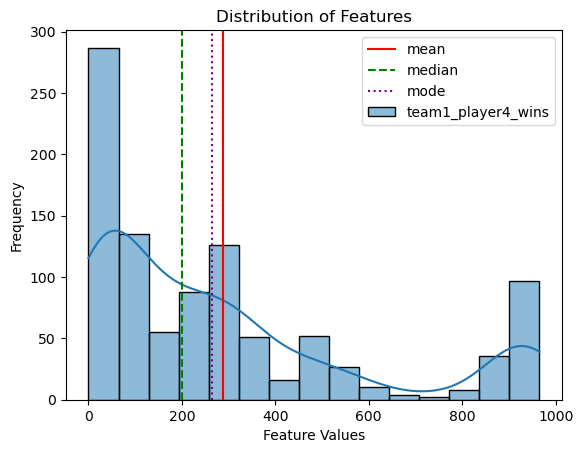

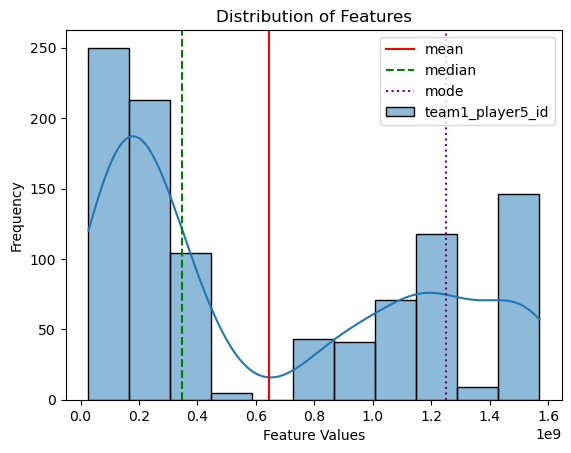

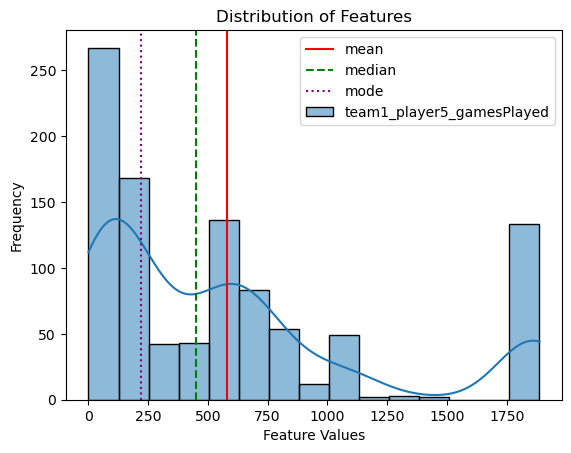

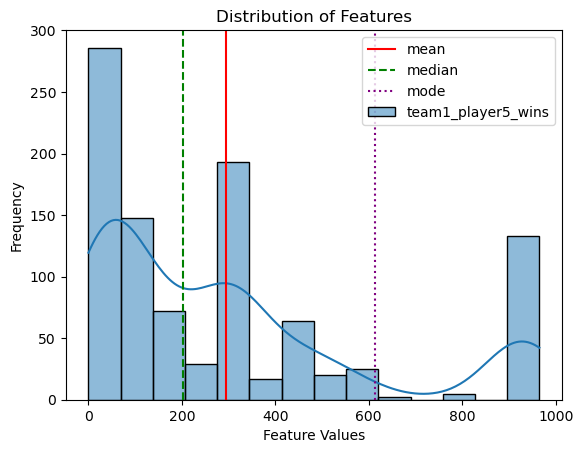

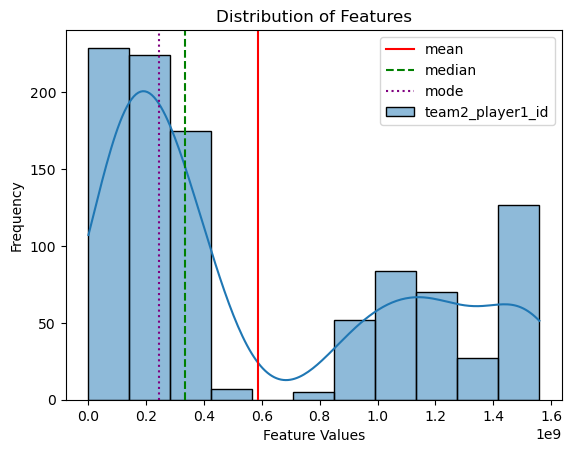

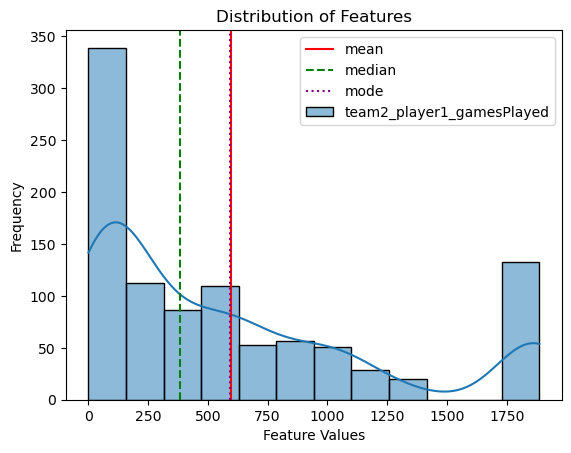

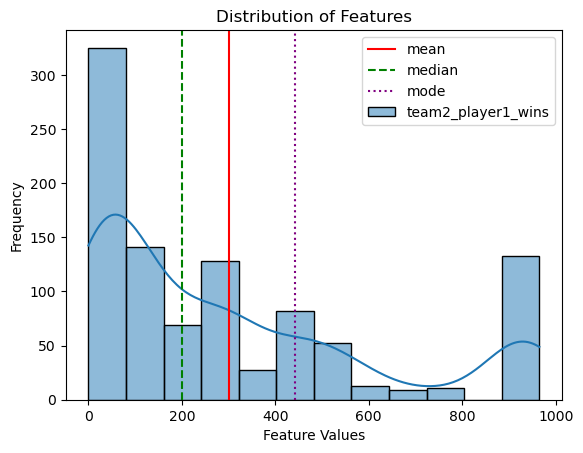

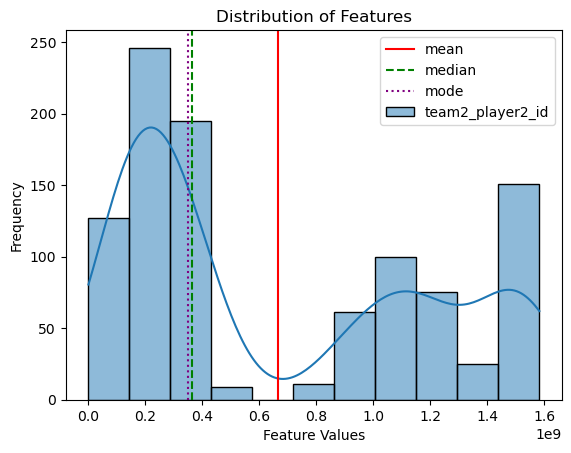

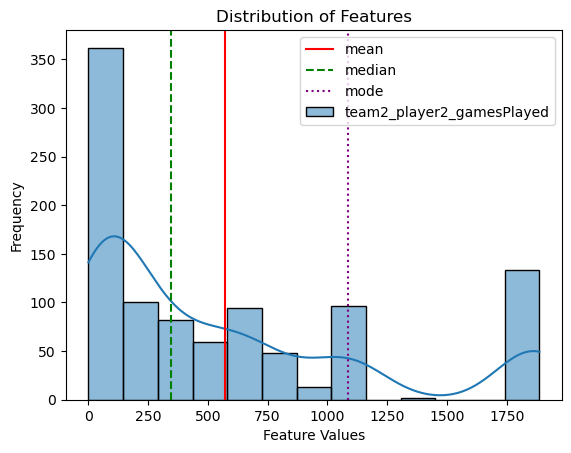

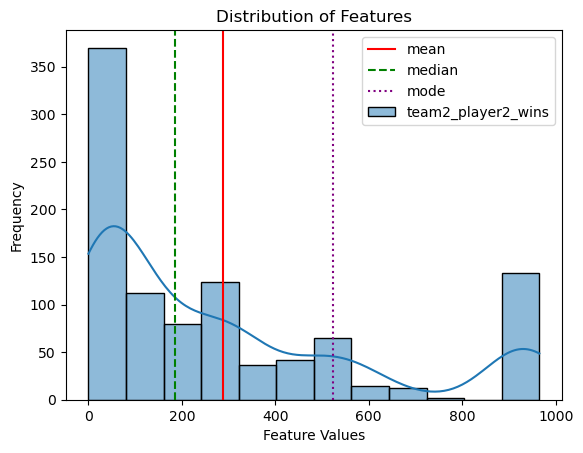

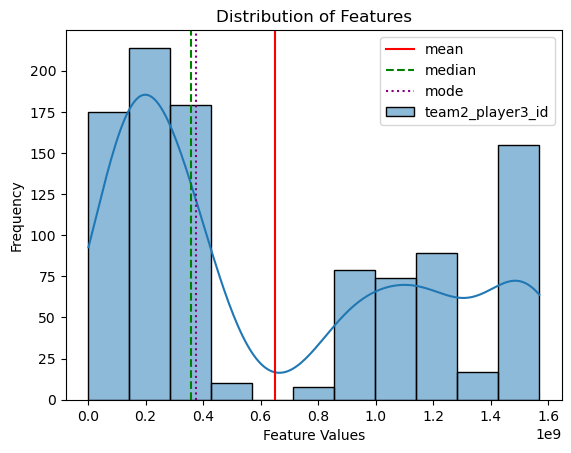

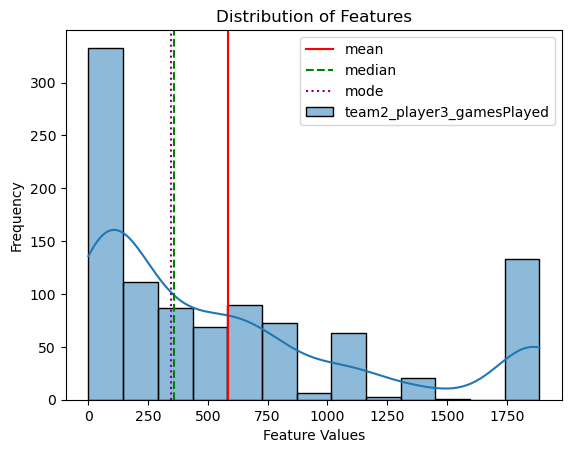

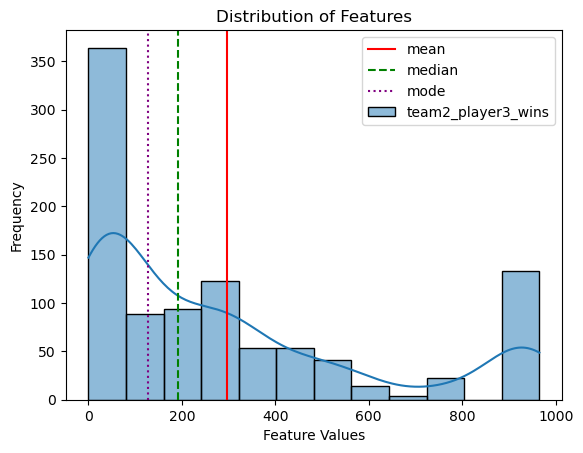

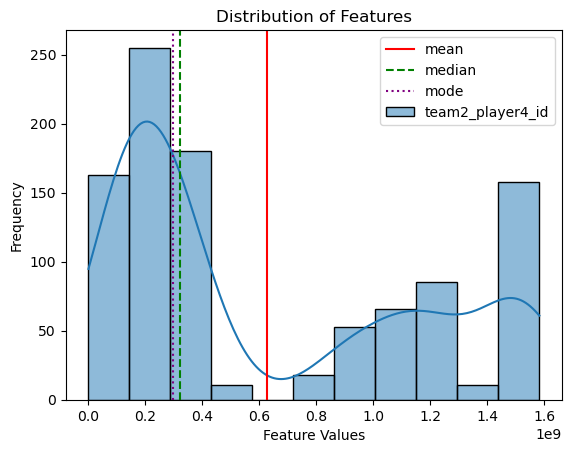

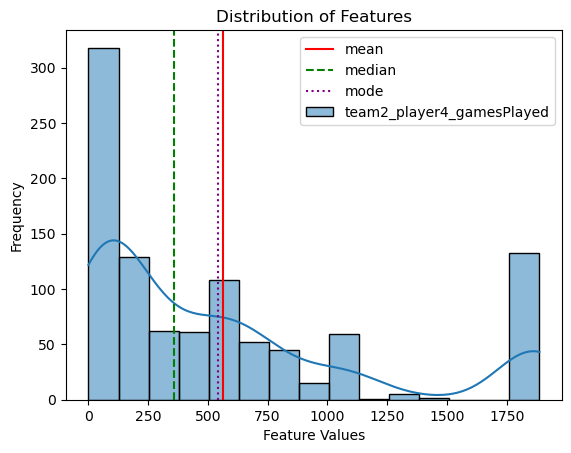

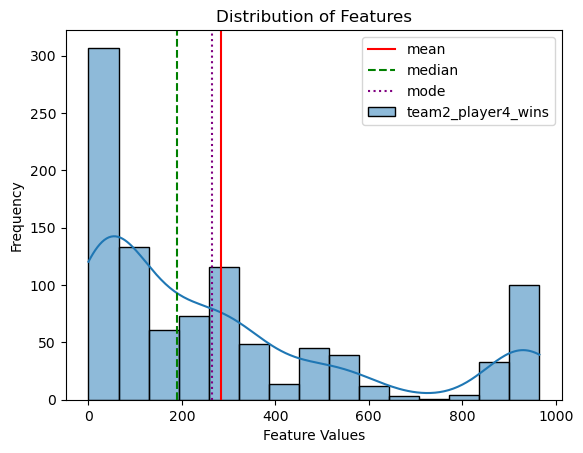

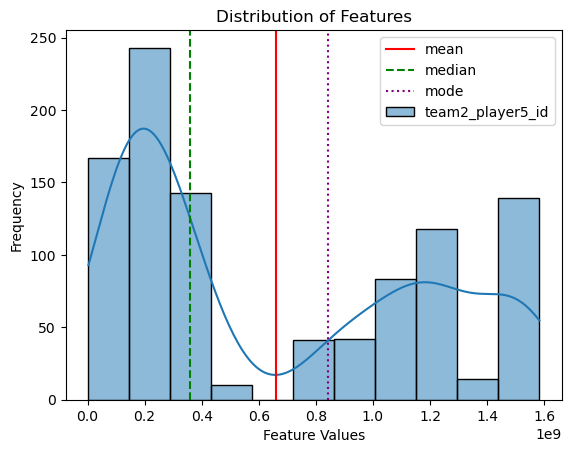

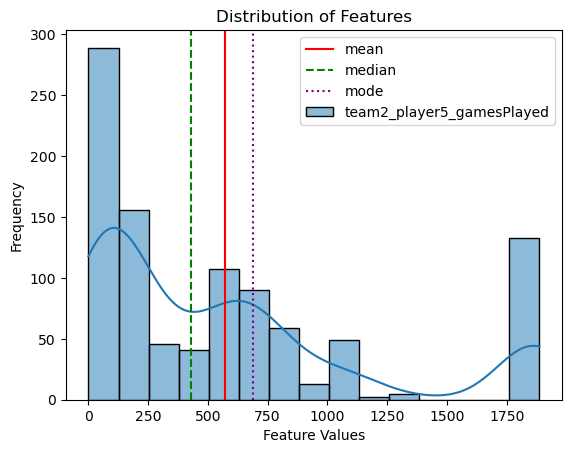

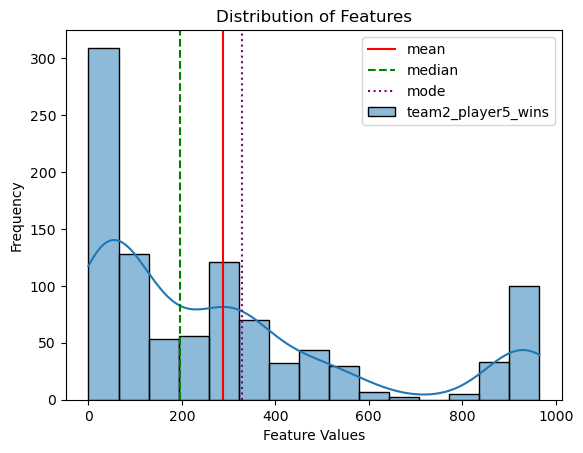

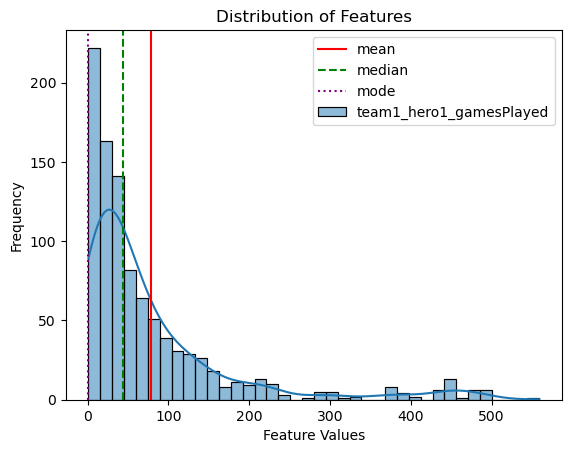

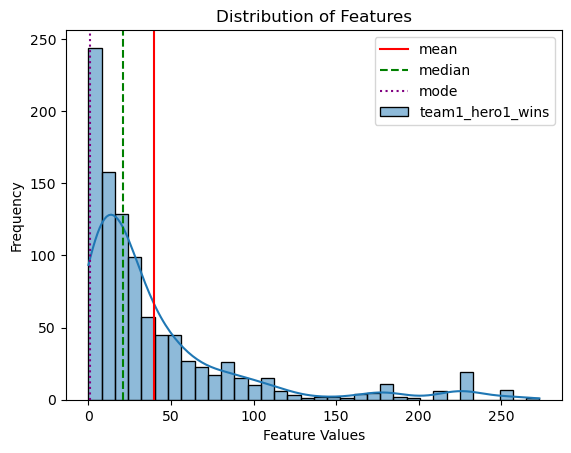

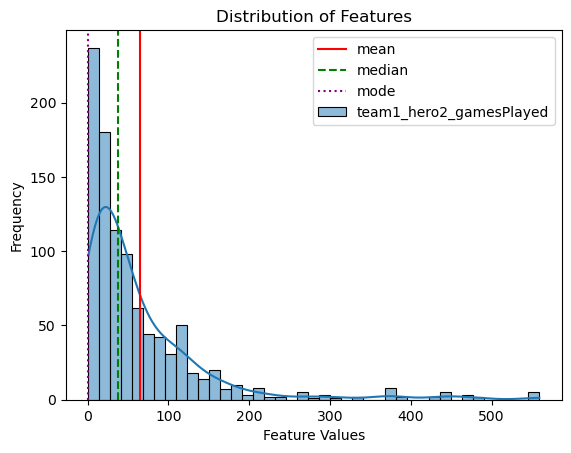

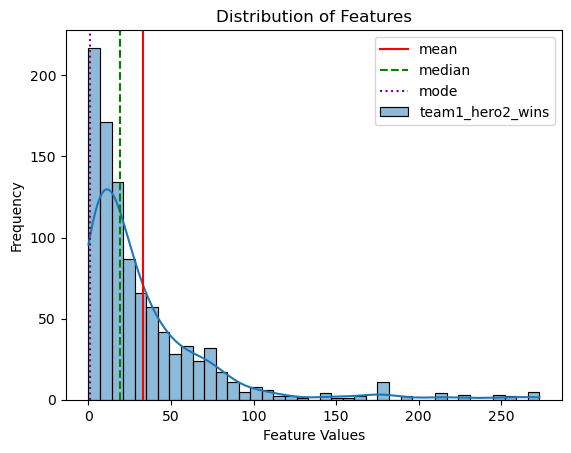

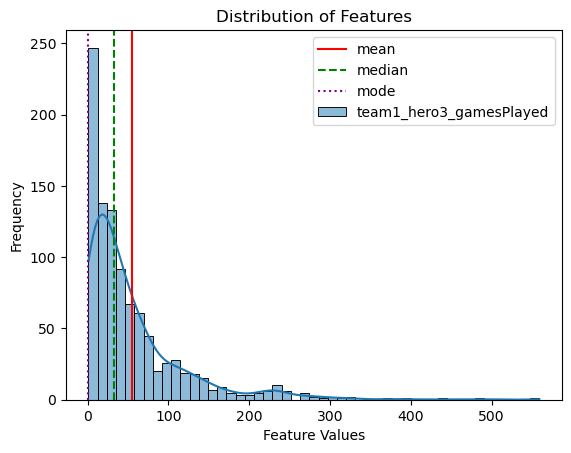

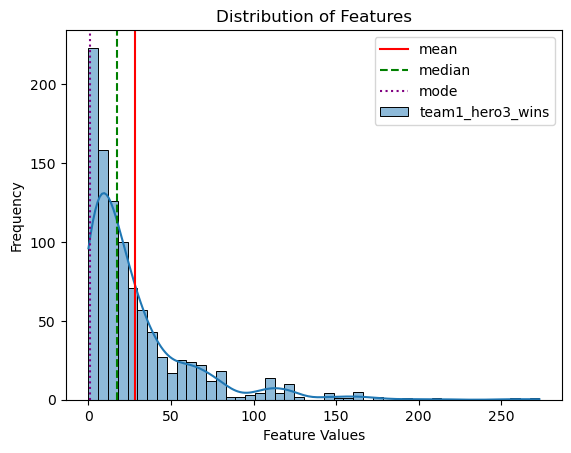

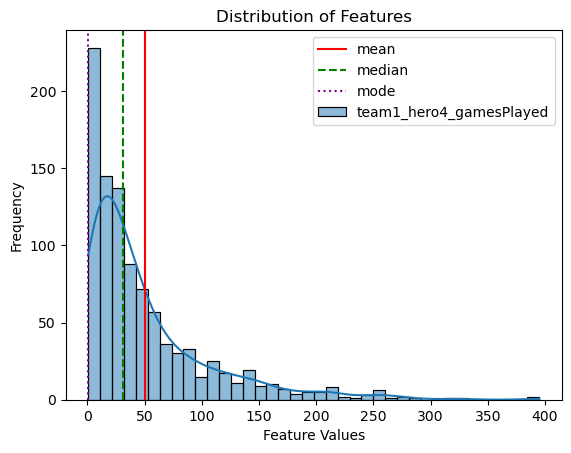

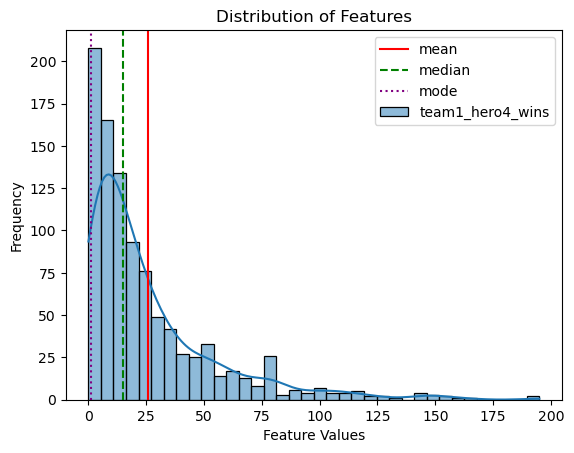

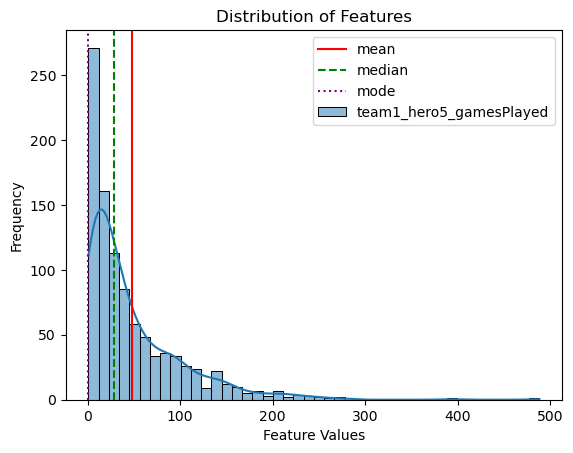

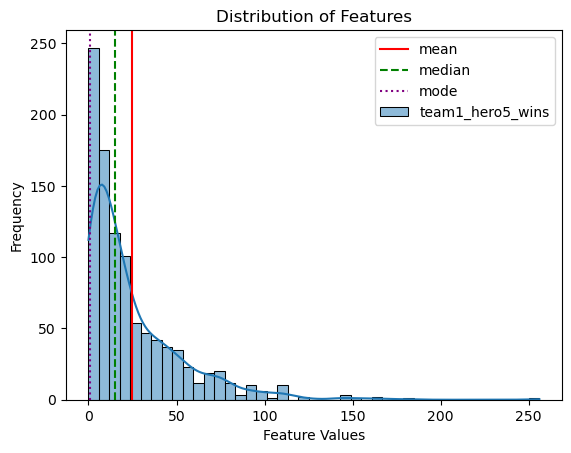

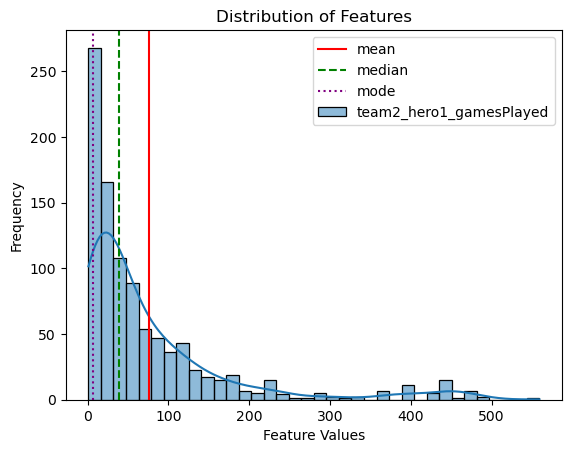

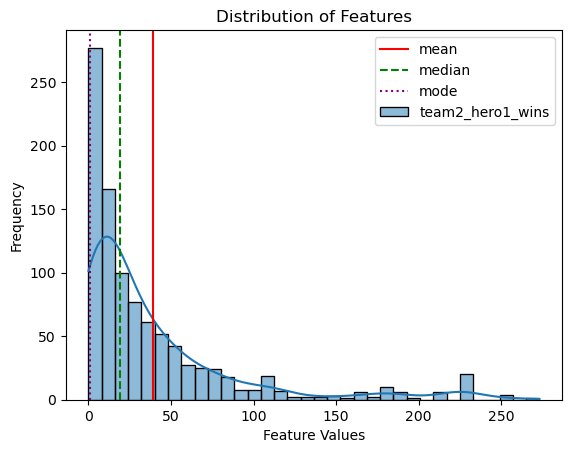

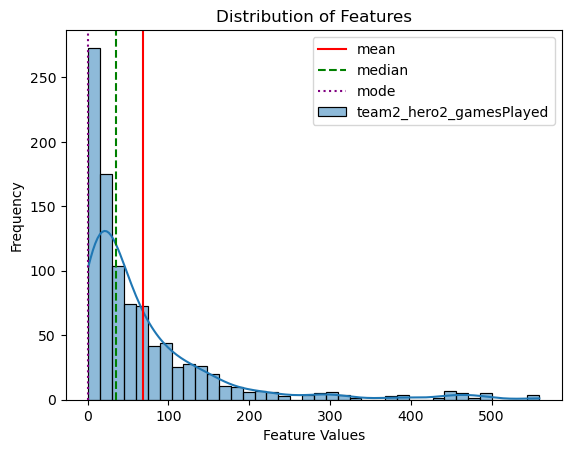

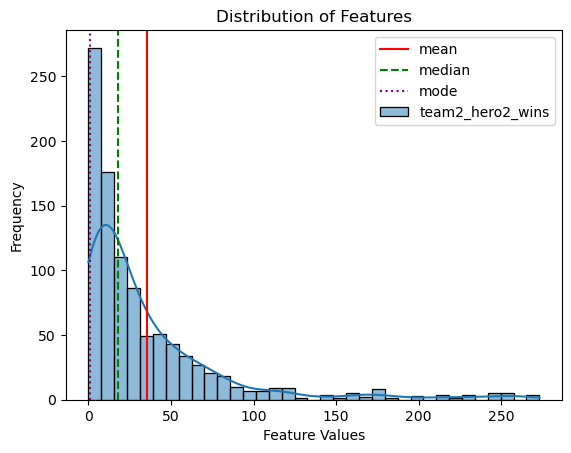

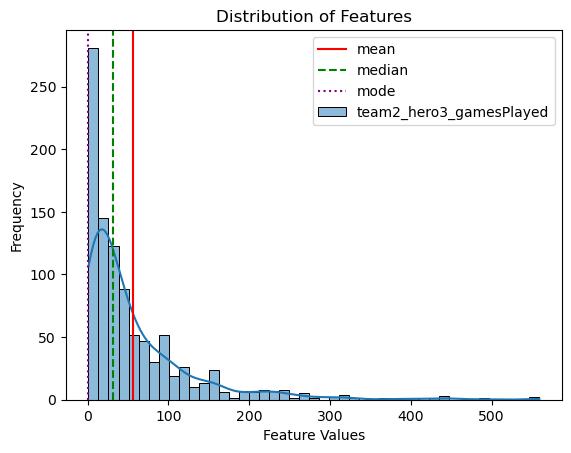

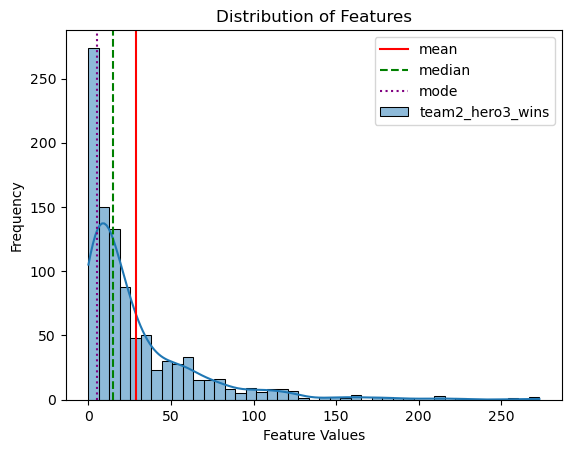

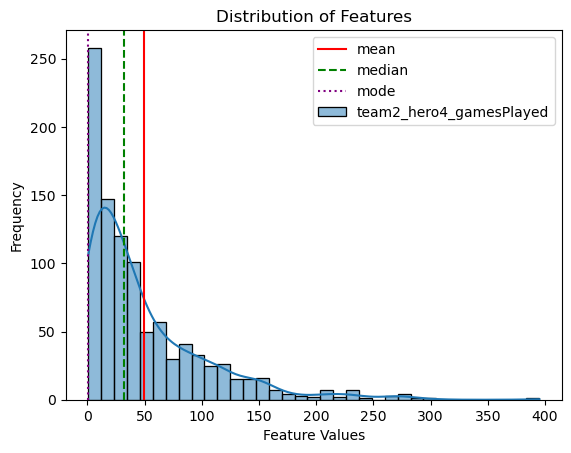

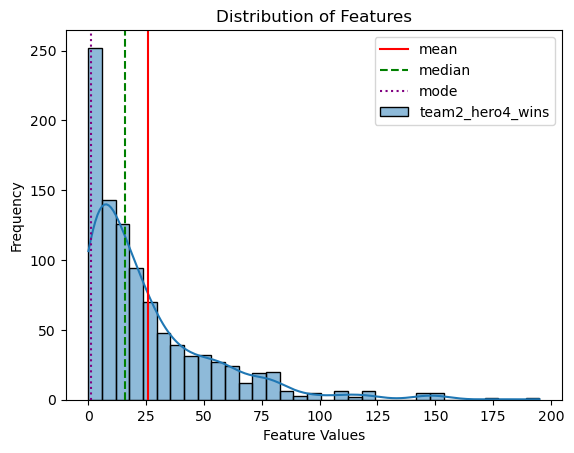

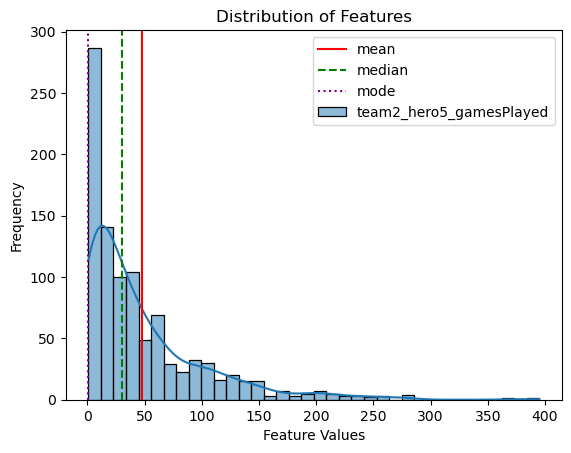

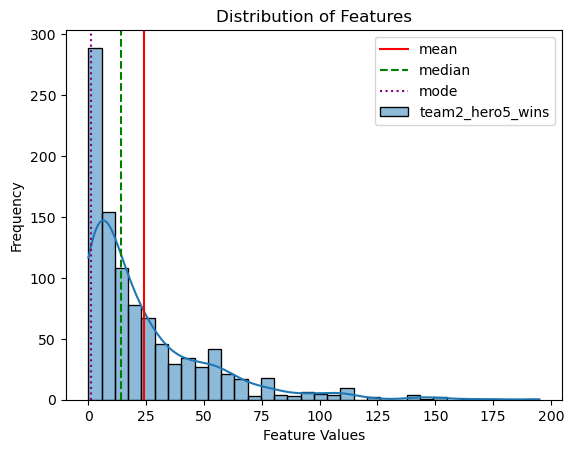

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution of data with mean, median and mode
def plot_one_column_distribution(df):
    
    # Extract only the numeric features for visualization
    df_numeric = df.select_dtypes(include='number')
    columns_numeric = list(df_numeric.columns)
    
    # Plot distributions
    for column in columns_numeric:
        sns.histplot(data=df_numeric, x=column, kde=True, label=column)
        mean = df_numeric[column].mean()
        median = df_numeric[column].median()
        mode = df_numeric[column].mode().mean()
    
    # Plot mode, median, and mean lines
    plt.axvline(x = mean, color='r', label='mean')
    plt.axvline(x = median, color='g', ls='--', label='median')
    plt.axvline(x = mode, color='purple', ls=':', label=f'mode')
    
    # Set the visualization
    plt.legend()
    plt.title("Distribution of Features")
    plt.xlabel("Feature Values")
    plt.ylabel("Frequency")
    plt.show()

def plot_all_columns_distributions(df_filename):

    # Extract only the numeric features for visualization
    df = pd.read_csv(df_filename)
    df_numeric = df.select_dtypes(include='number')
    columns_numeric = list(df_numeric.columns)
    
    # Plot distribution
    for col in list(df_numeric.columns):
        plot_one_column_distribution(df_numeric[[col]])
    
plot_all_columns_distributions('evaluation_1000.csv')